In [2]:
pip install yfinance

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as si

In [4]:
data1 = yf.download("AAPL", start="2020-03-01", end="2021-03-01")


[*********************100%***********************]  1 of 1 completed


In [5]:
data1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,70.570000,75.360001,69.430000,74.702499,74.127892,341397200
2020-03-03,75.917503,76.000000,71.449997,72.330002,71.773636,319475600
2020-03-04,74.110001,75.849998,73.282501,75.684998,75.102829,219178400
2020-03-05,73.879997,74.887497,72.852501,73.230003,72.666725,187572800
2020-03-06,70.500000,72.705002,70.307503,72.257500,71.701706,226176800


In [6]:
data1.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,128.009995,129.720001,125.599998,126.000000,126.000000,103916400
2021-02-23,123.760002,126.709999,118.389999,125.860001,125.860001,158273000
2021-02-24,124.940002,125.559998,122.230003,125.349998,125.349998,111039900
2021-02-25,124.680000,126.459999,120.540001,120.989998,120.989998,148199500
2021-02-26,122.589996,124.849998,121.199997,121.260002,121.260002,164320000


In [7]:
data1.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,251.00,251.00,251.00,251.00,251.00,2.510000e+02
mean,103.71,105.19,102.15,103.72,103.37,1.513452e+08
std,24.10,24.14,23.67,23.88,24.00,6.872757e+07
min,57.02,57.12,53.15,56.09,55.66,4.669130e+07
25%,80.00,80.86,79.22,80.14,79.73,1.029256e+08
50%,112.89,115.00,110.30,112.73,112.37,1.353724e+08
75%,122.60,124.86,120.72,122.83,122.65,1.809260e+08
max,143.60,145.09,141.37,143.16,142.95,4.184740e+08


In [8]:
ADJ =  data1['Adj Close']

Text(0.5, 1.0, 'Adjusted Close Price')

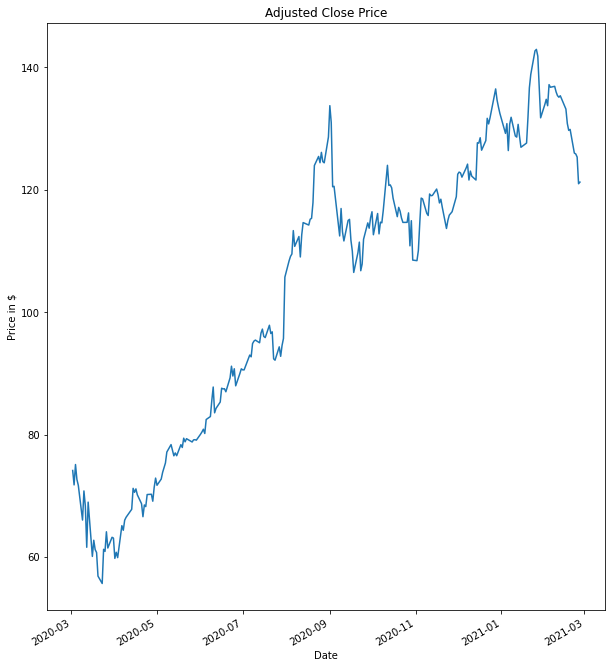

In [9]:
ADJ.plot(figsize=(10, 12), subplots=True)
plt.ylabel('Price in $')
plt.title('Adjusted Close Price')

In [10]:
log_return1 = np.log(data1['Adj Close'] / data1['Adj Close'].shift(1))

In [12]:
vol1 = np.sqrt(252) * log_return1.std()
print('Annualised volatility using 12-months historical data is', round(vol1*100,2), '%')

Annualised volatility using 12-months historical data is 45.73 %


In [13]:
data2 = yf.download("AAPL", start="2020-09-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [14]:
log_return2 = np.log(data2['Adj Close'] / data2['Adj Close'].shift(1))

In [15]:
vol2 = np.sqrt(252) * log_return2.std()
print('Annualised volatility using 6 months historical data is', round(vol2*100,2), '%')

Annualised volatility using 6 months historical data is 37.78 %


In [16]:
vol3 = (vol1+vol2)/2
print('Average annualized volatility is', round(vol3*100,2), '%')

Average annualized volatility is 41.76 %


In [29]:
S0 = 127.79              # spot stock price
K = 135                  # strike
T = 1/12                # maturity 
r = 0.0163               # risk free rate 
sigma = 0.4176          # diffusion coefficient or volatility
N = 4                    # number of periods or number of time steps  
payoff = "put"           # payoff

In [30]:
dT = float(T) / N                   # delta T
u = np.exp(sigma * np.sqrt(dT))     # up factor 
d = 1.0 / u                         # down factor
p = (np.exp(r*dT) - d) / (u - d)    # risk free up probability
q = 1.0 - p   
p

0.48775142451638376

In [31]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [32]:
S

array([[127.79      , 135.7294627 , 144.16219615, 153.11884674,
        162.63196492],
       [  0.        , 120.31495428, 127.79      , 135.7294627 ,
        144.16219615],
       [  0.        ,   0.        , 113.27715959, 120.31495428,
        127.79      ],
       [  0.        ,   0.        ,   0.        , 106.65103903,
        113.27715959],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        100.41251182]])

In [33]:
# Binary_option_payoff
V = np.where((S != 0) & (S < K),1.0,0.0 )
V

array([[1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

In [34]:
# for Binary Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.70468636, 0.51784137, 0.26222045, 0.        , 0.        ],
       [0.        , 0.88306315, 0.76158113, 0.51207465, 0.        ],
       [0.        , 0.        , 0.99932106, 0.99966047, 1.        ],
       [0.        , 0.        , 0.        , 0.99966047, 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [35]:
print('Price of a 1-month Binary put option using Binomial Tree is', str( V[0,0]))

Price of a 1-month Binary put option using Binomial Tree is 0.7046863647285551


In [36]:
def mcs_simulation_np(m,n):       #m is the number of steps and n is the number of simulation
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [37]:
S = mcs_simulation_np(90,10000)

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

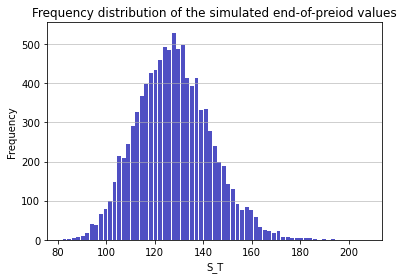

In [38]:
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [39]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put price using MC is', str(bpp))

Binary put price using MC is 0.6913


In [57]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    delta = -(np.exp(-r * T))*si.norm.pdf(d2, 0.0, 1.0) / (S * vol * np.sqrt(T))
    return delta

In [58]:
delta(127.9, 135, 1/12 , 0.0163, 0.82, 0.4176, 'put')

-0.014670439678078412

In [42]:
S = np.linspace(100,200,11)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 135, 1/12 , 0.0163, 0.82, 0.4176, 'put')

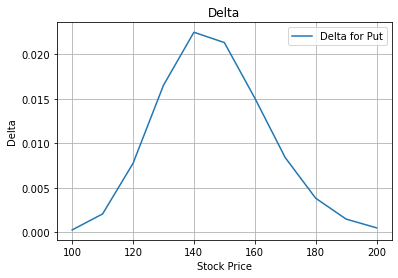

In [43]:
fig = plt.figure()
plt.plot(S, Delta_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [63]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    gamma = (np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0))/ ((S**2) * (vol**2) * np.sqrt(T))
    return gamma

In [64]:
gamma(127.9, 135, 1/12, 0.0163, 0.82, 0.41756, 'put')

-0.00025919347465354527

In [65]:
Gamma_Put = np.zeros((len(S),1))
for i in range(len(S)):
    
    Gamma_Put [i] = gamma(S[i],135, 1/12, 0.0163, 0.82, 0.4176, 'put')

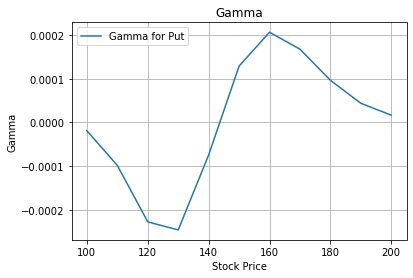

In [66]:
fig = plt.figure()
plt.plot(S, Gamma_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [48]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    theta = (r * np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) - ((np.exp(-r * T))* si.norm.pdf(d2, 0.0, 1.0)* (d1/ (2 * T))-((r -q )/(vol * np.sqrt(T)))))*(-1)
    return theta

In [49]:
theta(127.9, 135, 1/12, 0.0163, 0.82, 0.4176, 'put')

5.372525531522103

In [50]:
T = np.linspace(0.25,3,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(127.9, 135, T[i],0.0163, 0.82, 0.4176, 'put')

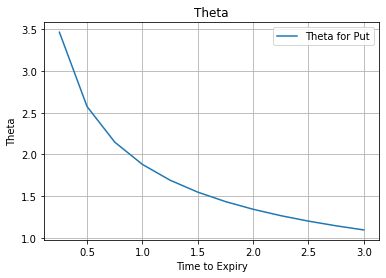

In [51]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [78]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    rho = - T * np.exp(-r * T) * (1-si.norm.cdf(d2,0.0,1.0)) - (si.norm.pdf(d2,0.0,1.0) * np.exp(-r * T) * (np.sqrt(T)/ vol))
    return rho

In [79]:
rho(127.9, 135, 1/12, 0.0163, 0.82, 0.4176, 'put')

-0.227627081207111

In [80]:
r = np.linspace(0,0.1,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    
    Rho_Put [i] = rho(127.9, 135, 0.083, r[i],  0.82, 0.41755, 'put')

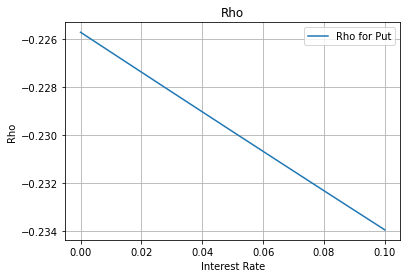

In [81]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

In [56]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    vega = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1/ vol)
    
    return vega

In [47]:
vega(127.9, 135, 1/12, 0.0163, 0.82, 0.4176, 'put')

-0.511233300983934

In [48]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(127.9, 135, 0.083, 0.0163, 0.82, vol[i], 'put' )

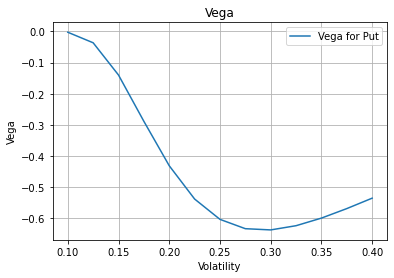

In [49]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])